In [1]:
# first, read in the infercnv dataset
import scanpy as sc
import infercnvpy as cnv
tmp = cnv.datasets.maynard2020_3k()
tmp.var.loc[:, ["ensg", "chromosome", "start", "end"]].head()

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 49.5M/49.5M [00:12<00:00, 4.22MB/s]


,ensg,chromosome,start,end
symbol,,,,
AL645933.5,ENSG00000288587.1,chr6,31400702,31463705
AC010184.1,ENSG00000288585.1,chr3,141449745,141456434
AC023296.1,ENSG00000288580.1,chr8,2923568,2926689
AL117334.2,ENSG00000288577.1,chr20,3406380,3410036
AC107294.4,ENSG00000288576.1,chr3,184778723,184780720


In [2]:
# read in caron
adata = sc.read_h5ad("/Users/randyramdial/Desktop/FoMR/Caron-Test.h5ad")
adata

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 25825 × 1762
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
# check
adata.var

,gene_ids,feature_types,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
HES4,ENSG00000188290,Gene Expression,3643,False,3643,0.302325,90.743235,11898.0,True,0.401458,2.226125,3.362851,3.563191e-11,0.505089
ISG15,ENSG00000187608,Gene Expression,15648,False,15648,0.888731,60.238851,34976.0,True,1.092665,2.377257,2.064641,1.748202e-10,0.855208
TNFRSF18,ENSG00000186891,Gene Expression,480,False,480,0.014865,98.780333,585.0,True,0.032244,1.456615,0.927936,4.680955e-11,0.141240
TNFRSF4,ENSG00000186827,Gene Expression,1039,False,1039,0.040960,97.359929,1612.0,True,0.094154,1.872313,2.273542,-3.806432e-11,0.239586
PRKCZ,ENSG00000067606,Gene Expression,519,False,519,0.013620,98.681235,536.0,True,0.042845,1.446783,0.896110,-7.172387e-12,0.164351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COL18A1,ENSG00000182871,Gene Expression,860,False,860,0.025257,97.814763,994.0,True,0.053978,1.361866,0.621235,1.709378e-11,0.182988
COL6A2,ENSG00000142173,Gene Expression,561,False,561,0.015729,98.574514,619.0,True,0.050485,1.438194,0.868308,-2.780917e-11,0.178534
S100B,ENSG00000160307,Gene Expression,666,False,666,0.026934,98.307712,1060.0,True,0.099023,2.093603,2.989853,-4.261838e-11,0.245309
MT-ND6,ENSG00000198695,Gene Expression,12394,True,12394,0.572786,68.507178,22542.0,True,0.570455,1.495094,0.696062,-1.195077e-10,0.591059


In [4]:
# reset to full data set so it has 23198 genes instead of 1762
adata = adata.raw.to_adata()
adata

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 25825 × 23198
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
# transfer the infercnv extra info
for var in ["chromosome",	"start",	"end"]:
    adata.var[var] = tmp.var[var]

In [6]:
#check that the transfer went ok
adata.var

,gene_ids,feature_types,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,chromosome,start,end
RP11-34P13.7,ENSG00000238009,Gene Expression,35,False,35,0.000889,99.911066,35.0,False,0.001894,1.063653,-0.344076,NaN,NaN,NaN
RP11-34P13.8,ENSG00000239945,Gene Expression,5,False,5,0.000127,99.987295,5.0,False,0.000194,1.141043,-0.093564,NaN,NaN,NaN
FO538757.3,ENSG00000279928,Gene Expression,3,False,3,0.000102,99.992377,4.0,False,0.000207,1.080964,-0.288039,NaN,NaN,NaN
FO538757.2,ENSG00000279457,Gene Expression,7180,False,7180,0.212908,81.755812,8379.0,False,0.408469,1.309081,0.017487,NaN,NaN,NaN
AP006222.2,ENSG00000228463,Gene Expression,1979,False,1979,0.053767,94.971414,2116.0,False,0.090135,1.201137,0.100957,chr1,266855.0,268655.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,ENSG00000278384,Gene Expression,131,False,131,0.003405,99.667133,134.0,False,0.006647,0.971897,-0.641086,GL000218.1,51867.0,54893.0
AC004556.1,ENSG00000276345,Gene Expression,2467,False,2467,0.074451,93.731419,2930.0,False,0.130339,1.261076,0.294979,NaN,NaN,NaN
AC233755.2,ENSG00000277856,Gene Expression,53,False,53,0.001347,99.865328,53.0,False,0.002501,1.029297,-0.455284,KI270726.1,26241.0,26534.0
AC233755.1,ENSG00000275063,Gene Expression,160,False,160,0.004396,99.593444,173.0,False,0.010842,1.287225,0.379621,KI270726.1,41444.0,41876.0


In [7]:
# remove the vars that that did not transfer
import pandas as pd
adata = adata[:, pd.notnull(adata.var.chromosome)].copy()
adata

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 25825 × 17301
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'chromosome', 'start', 'end'
    uns: 'hvg', 'leiden', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [8]:
# make it ready and save
adata.raw = adata

In [9]:
adata

AnnData object with n_obs × n_vars = 25825 × 17301
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'chromosome', 'start', 'end'
    uns: 'hvg', 'leiden', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [10]:
cell_type_dict = {
    "0": "Mixed Immune Cells",
    "1": "T Cells",
    "2": "Antigen-Presenting Cells",
    "3": "Mixed Population or Artifact",
    "4": "Highly Proliferative Cells",
    "5": "Virus-Activated Immune Cells",
    "6": "T Cells",
    "7": "Mixed T Cells and Antigen-Presenting Cells",
    "8": "Unclear Cell Type",
    "9": "Immune Cells (NF-kappaB Pathway)",
    "10": "Myeloid or Dendritic Cells",
    "11": "Antigen-Presenting Cells",
    "12": "B Cells",
    "13": "B or Plasma Cells",
    "14": "B Cells",
    "15": "Unclear Cell Type",
    "16": "Unclear Cell Type",
    "17": "Unclear Cell Type",
    "18": "NK or Cytotoxic Lymphocytes",
    "19": "B or Plasma Cells"
}
adata.obs["celltype"] = [cell_type_dict[x] for x in adata.obs['leiden']]
adata

AnnData object with n_obs × n_vars = 25825 × 17301
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'chromosome', 'start', 'end'
    uns: 'hvg', 'leiden', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [11]:
adata.write_h5ad("/Users/randyramdial/Desktop/FoMR/Caron-Test_infercnv_ready.h5ad", compression = "gzip")

... storing 'celltype' as categorical


/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


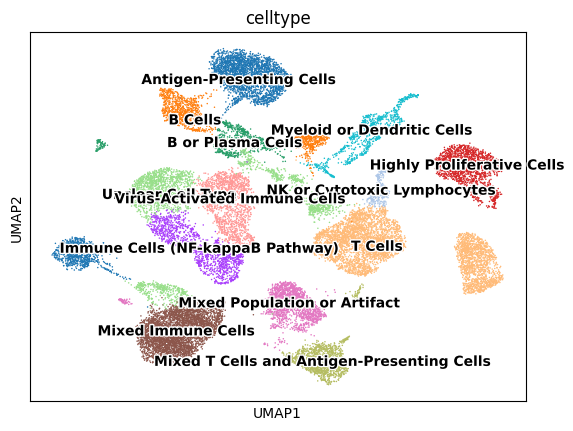

In [13]:
sc.pl.umap(adata, color ="celltype", legend_loc = "on data", legend_fontoutline=2)

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


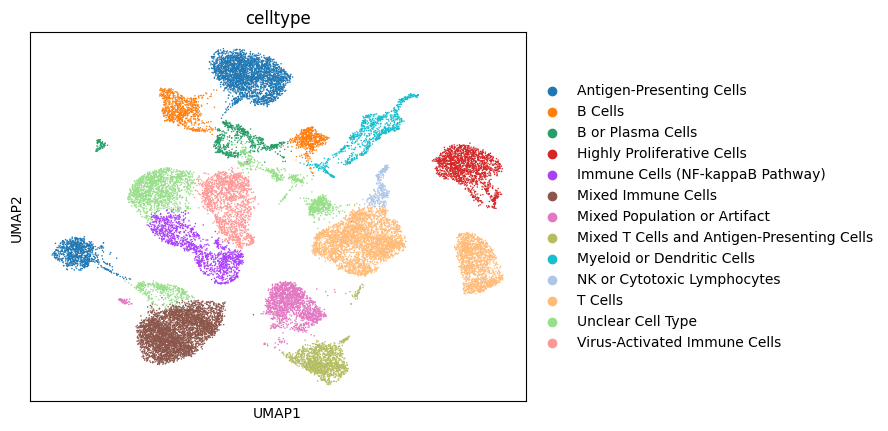

In [63]:
sc.pl.umap(adata, color ="celltype")

In [12]:
sorted(list(adata.obs.celltype.unique()))

['Antigen-Presenting Cells',
 'B Cells',
 'B or Plasma Cells',
 'Highly Proliferative Cells',
 'Immune Cells (NF-kappaB Pathway)',
 'Mixed Immune Cells',
 'Mixed Population or Artifact',
 'Mixed T Cells and Antigen-Presenting Cells',
 'Myeloid or Dendritic Cells',
 'NK or Cytotoxic Lymphocytes',
 'T Cells',
 'Unclear Cell Type',
 'Virus-Activated Immune Cells']

In [62]:
adata = sc.read_h5ad("/Users/randyramdial/Desktop/FoMR/Caron-Test_infercnv_ready.h5ad")
adata

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 25825 × 17301
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'celltype', 'cnv_leiden', 'cnv_score', 'cnv_status'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'chromosome', 'start', 'end'
    uns: 'celltype_colors', 'cnv', 'cnv_leiden_colors', 'cnv_neighbors', 'cnv_status_colors', 'dendrogram_cnv_leiden', 'hvg', 'leiden', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_cnv', 'X_cnv_pca', 'X_cnv_umap', 'X_pca', 'X_umap'
    obsp: 'cnv_neighbors_connectivities', 'cnv_neighbors_distances', 'connectivities', 'distances'

In [36]:
adata.obs

,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,celltype,cnv_leiden,cnv_score,cnv_status
AAACCTGAGACTTTCG-1,434,2055,2055,6759.0,303.0,4.482912,11,Antigen-Presenting Cells,7,0.006269,normal
AAACGGGCACCATCCT-1,434,1015,1015,2221.0,107.0,4.817650,11,Antigen-Presenting Cells,7,0.006269,normal
AAACGGGTCGTGGTCG-1,434,1381,1381,3569.0,143.0,4.006724,11,Antigen-Presenting Cells,7,0.006269,normal
AAAGATGAGCGATGAC-1,434,880,880,1682.0,77.0,4.577883,11,Antigen-Presenting Cells,1,0.007350,tumor
AAAGCAAAGGCTAGAC-1,434,1997,1997,5718.0,228.0,3.987408,11,Antigen-Presenting Cells,7,0.006269,normal
...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACAATGAAAC-1,444,699,699,2051.0,91.0,4.436860,1,T Cells,0,0.005319,normal
TTTGTCACATCTGGTA-1,444,1073,1073,3332.0,137.0,4.111645,14,B Cells,2,0.005639,normal
TTTGTCAGTACAGCAG-1,444,879,879,2479.0,78.0,3.146430,1,T Cells,4,0.006462,normal
TTTGTCAGTGTGAATA-1,444,1465,1465,3218.0,33.0,1.025482,13,B or Plasma Cells,2,0.005639,normal


In [83]:
# We provide all myeloid cell types as "normal cells".
cnv.tl.infercnv(
    adata,
    reference_key="celltype",
    reference_cat=[
        "Antigen-Presenting Cells",
        "Myeloid or Dendritic Cells",
        "B or Plasma Cells",
    ],
    window_size=250,
)

100%|██████████| 6/6 [01:54<00:00, 19.15s/it]


/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


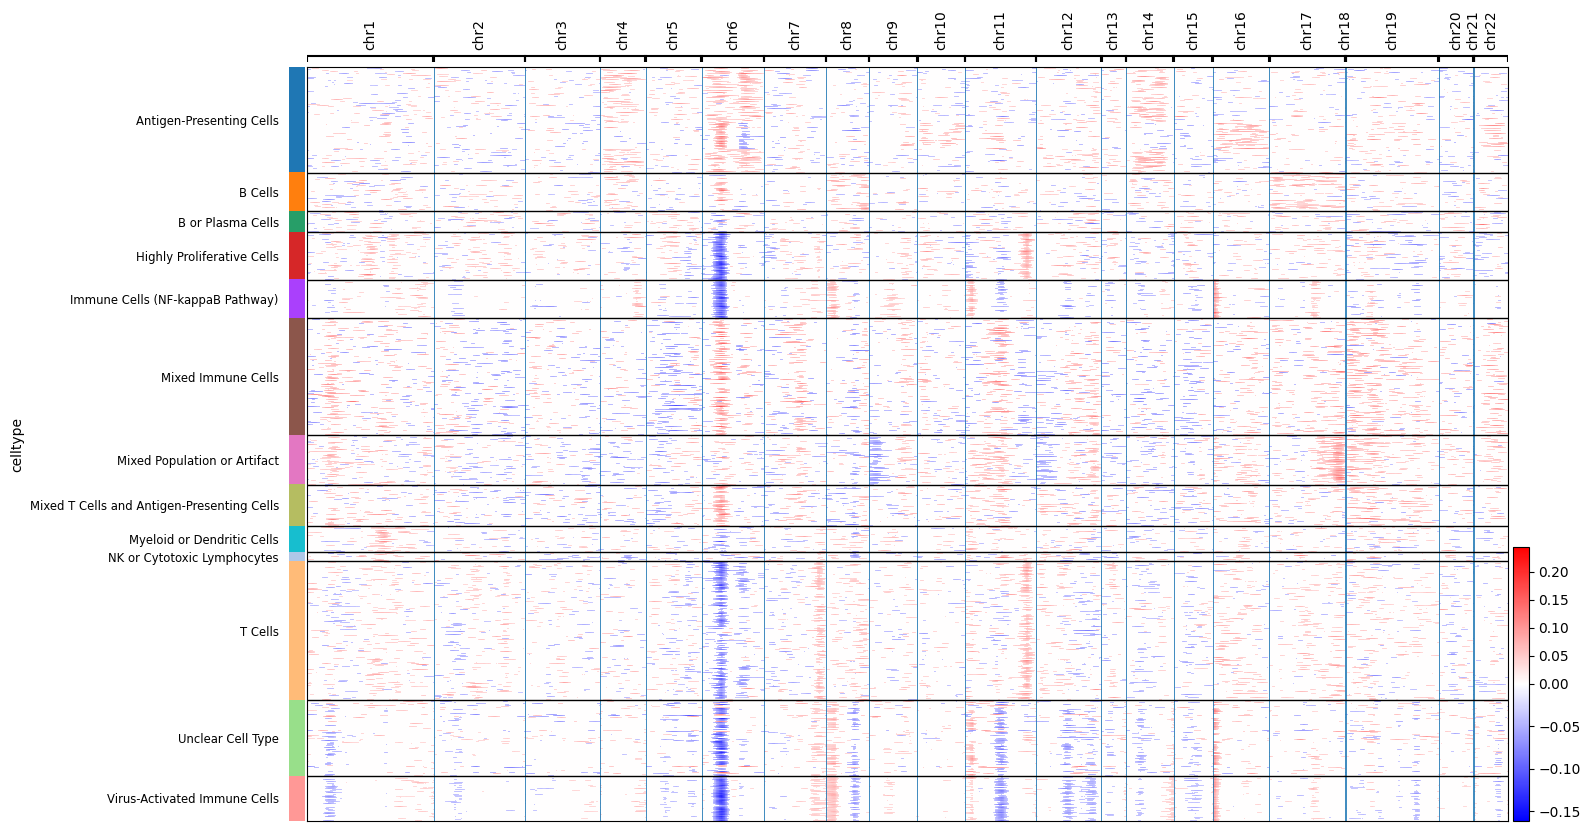

In [87]:
#Plot smoothed gene expression by cell-type and chromosome

cnv.pl.chromosome_heatmap(adata, groupby="celltype")

Clustering by CNV profiles and identifying tumor cells

In [88]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.leiden(adata)

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


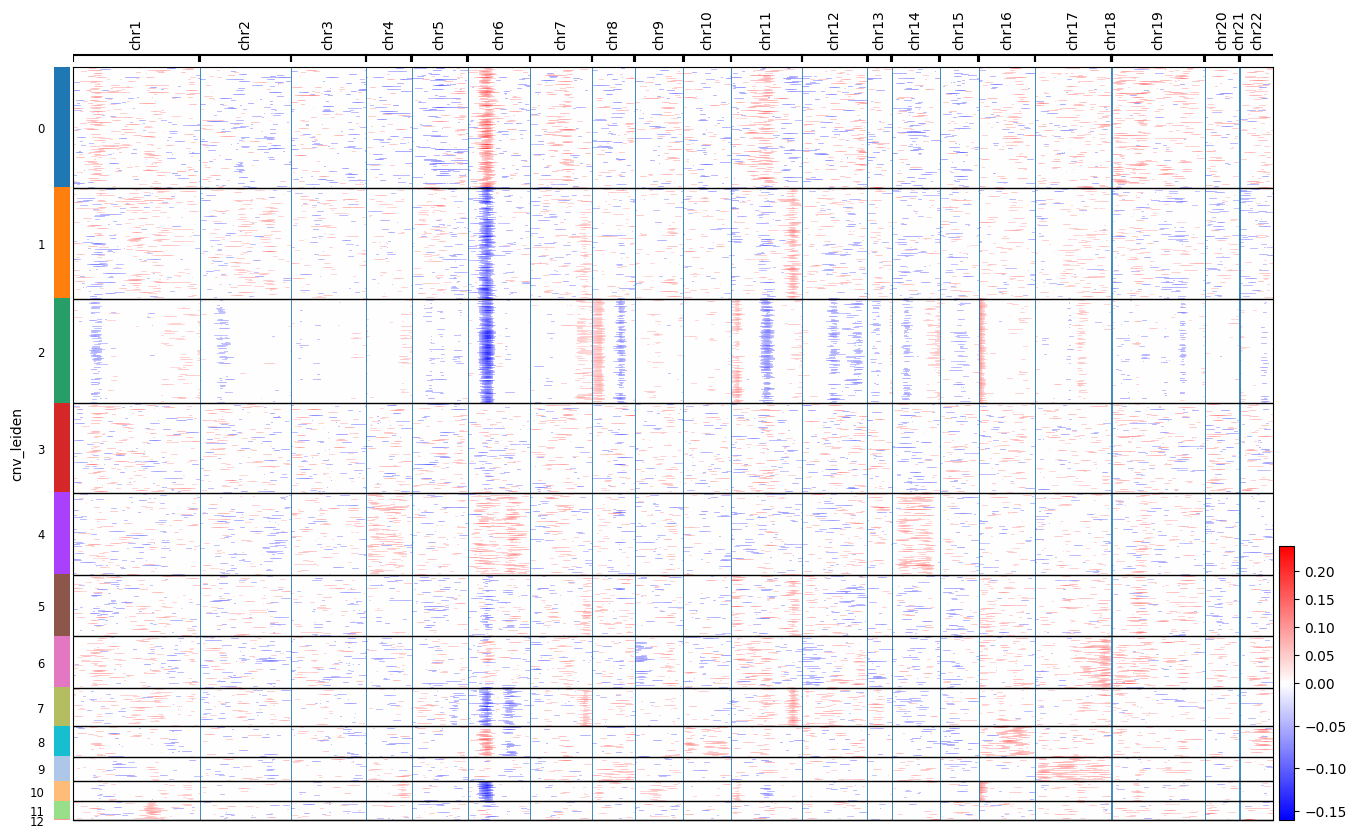

In [91]:
if "cnv_leiden_colors" in adata.uns:
    adata.uns.pop("cnv_leiden_colors")
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden")

UMAP plot of CNV profiles

In [92]:
cnv.tl.umap(adata)
cnv.tl.cnv_score(adata)

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


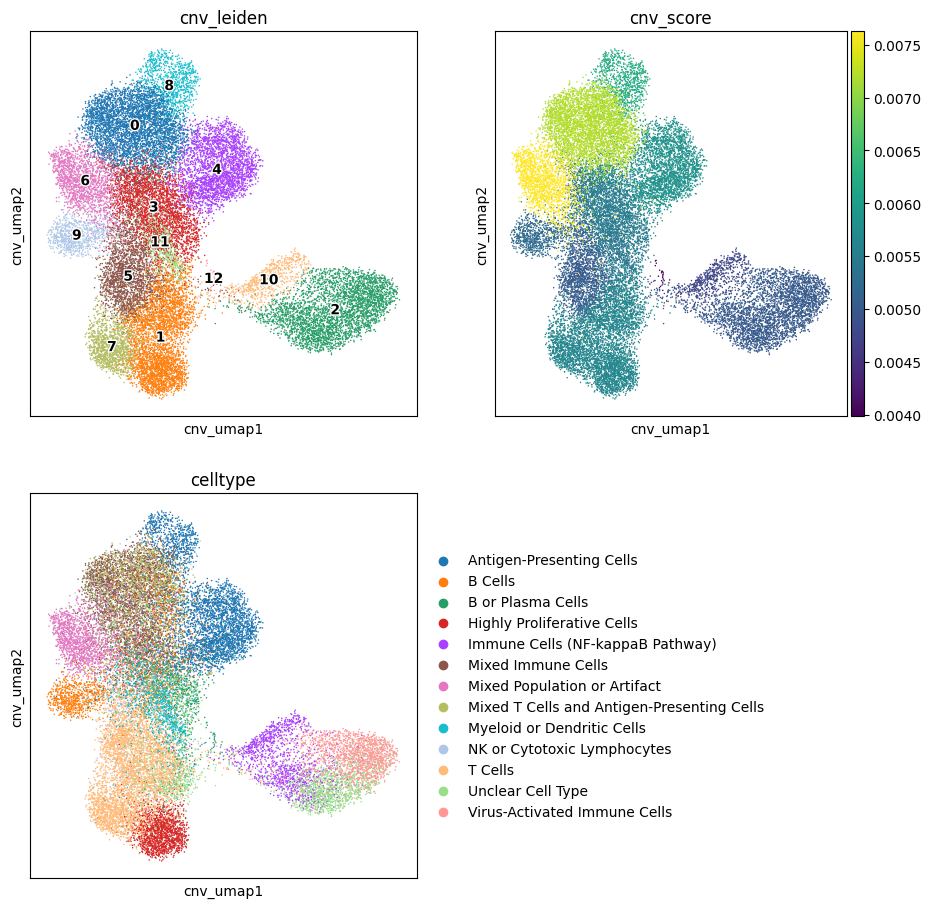

In [93]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11, 11))
ax4.axis("off")
cnv.pl.umap(
    adata,
    color="cnv_leiden",
    legend_loc="on data",
    legend_fontoutline=2,
    ax=ax1,
    show=False,
)
cnv.pl.umap(adata, color="cnv_score", ax=ax2, show=False)
cnv.pl.umap(adata, color="celltype", ax=ax3)

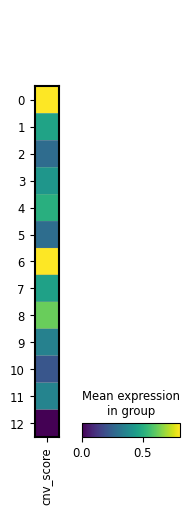

In [108]:
sc.pl.matrixplot(adata, "cnv_score", groupby = "cnv_leiden", standard_scale = "var", vmax=.8)

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


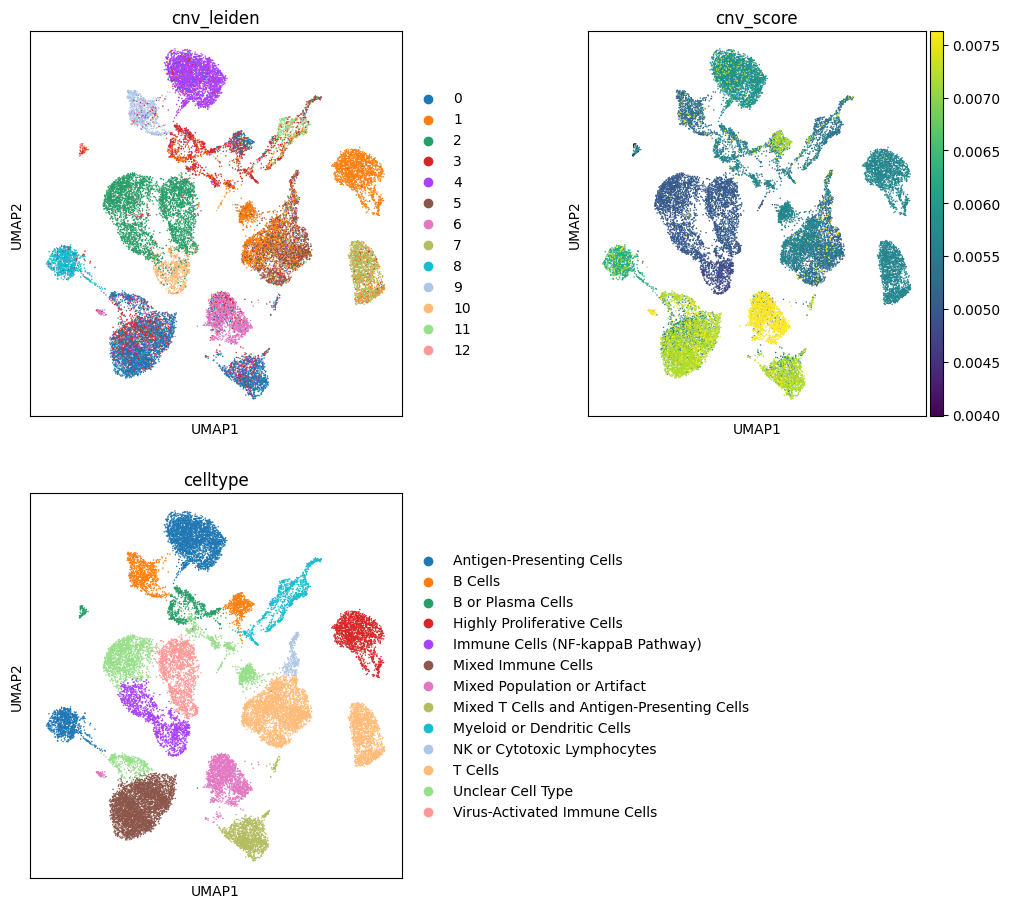

In [94]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    2, 2, figsize=(12, 11), gridspec_kw=dict(wspace=0.5)
)
ax4.axis("off")
sc.pl.umap(adata, color="cnv_leiden", ax=ax1, show=False)
sc.pl.umap(adata, color="cnv_score", ax=ax2, show=False)
sc.pl.umap(adata, color="celltype", ax=ax3)

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


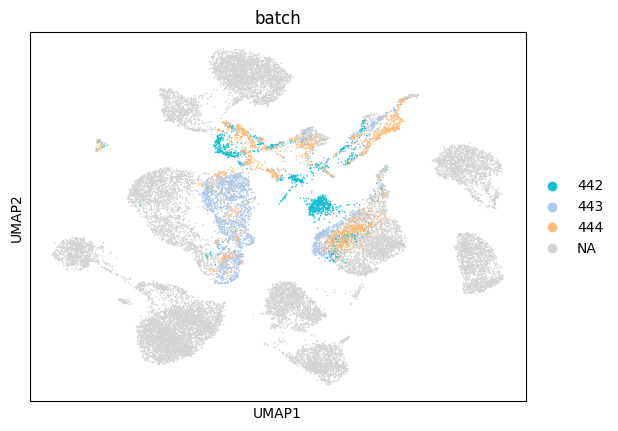

In [95]:
sc.pl.umap(adata, color="batch", groups= ["442", "443", "444",])

Classifying tumor cells

In [109]:
adata.obs["cnv_status"] = "normal"
adata.obs.loc[
    adata.obs["cnv_leiden"].isin(["0", "6", "8"]), "cnv_status"
] = "tumor"

... storing 'cnv_status' as categorical


/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


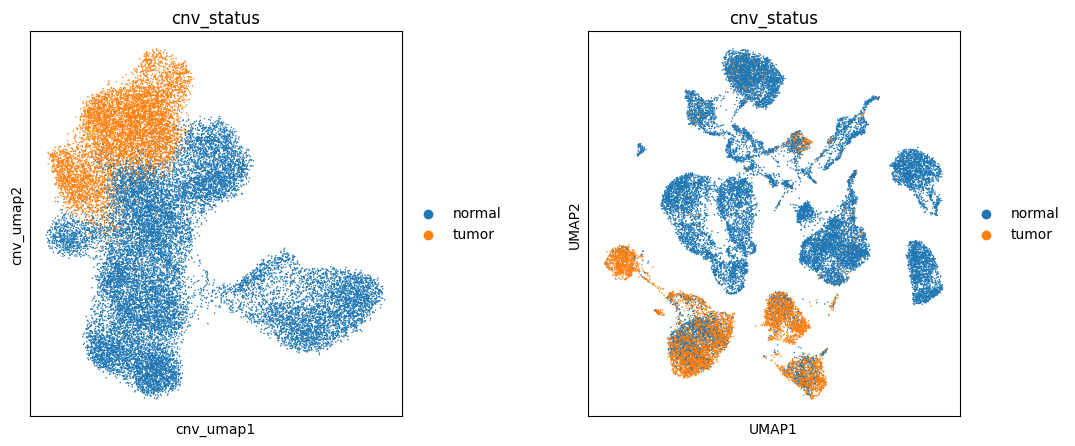

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw=dict(wspace=0.5))
cnv.pl.umap(adata, color="cnv_status", ax=ax1, show=False)
sc.pl.umap(adata, color="cnv_status", ax=ax2)

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


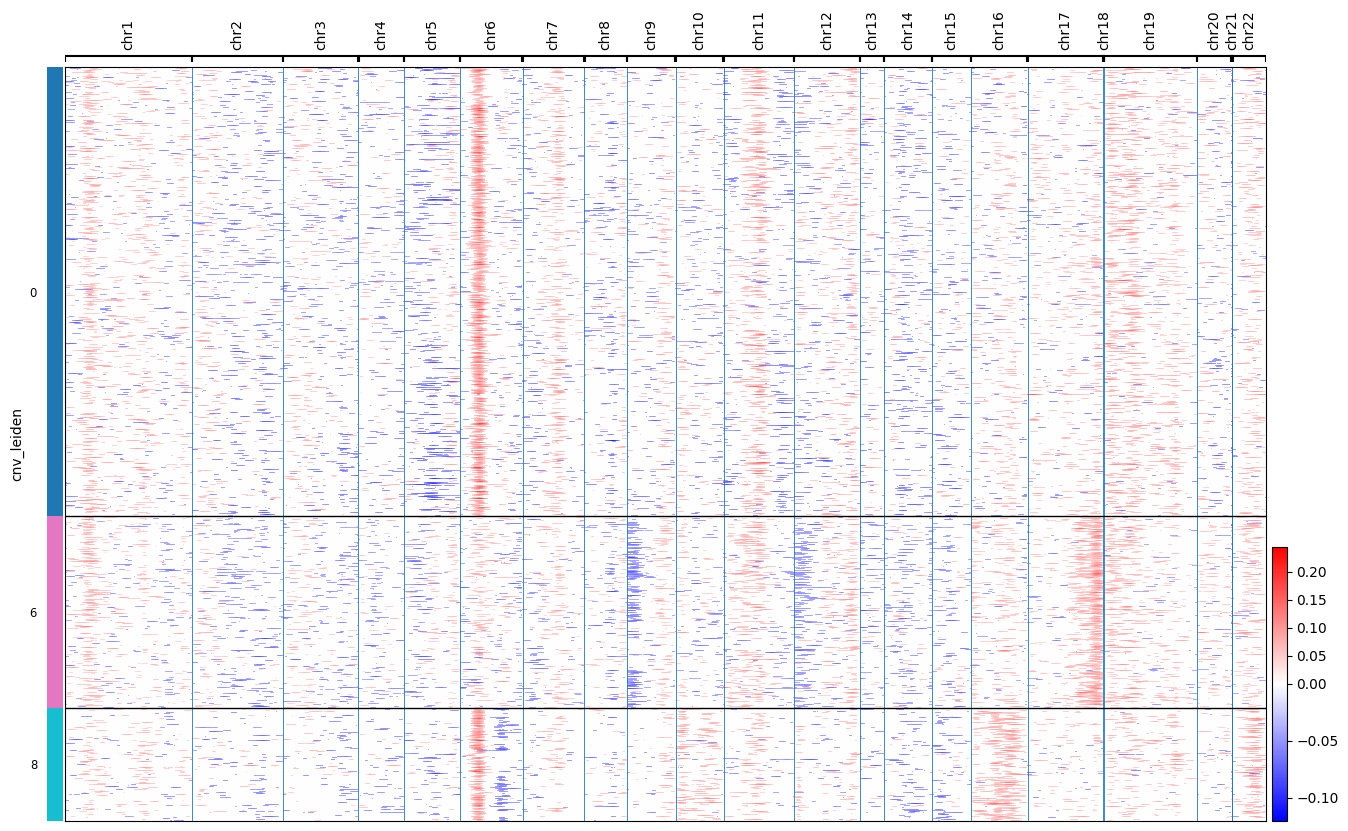

In [111]:
cnv.pl.chromosome_heatmap(adata[adata.obs["cnv_status"] == "tumor", :])

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


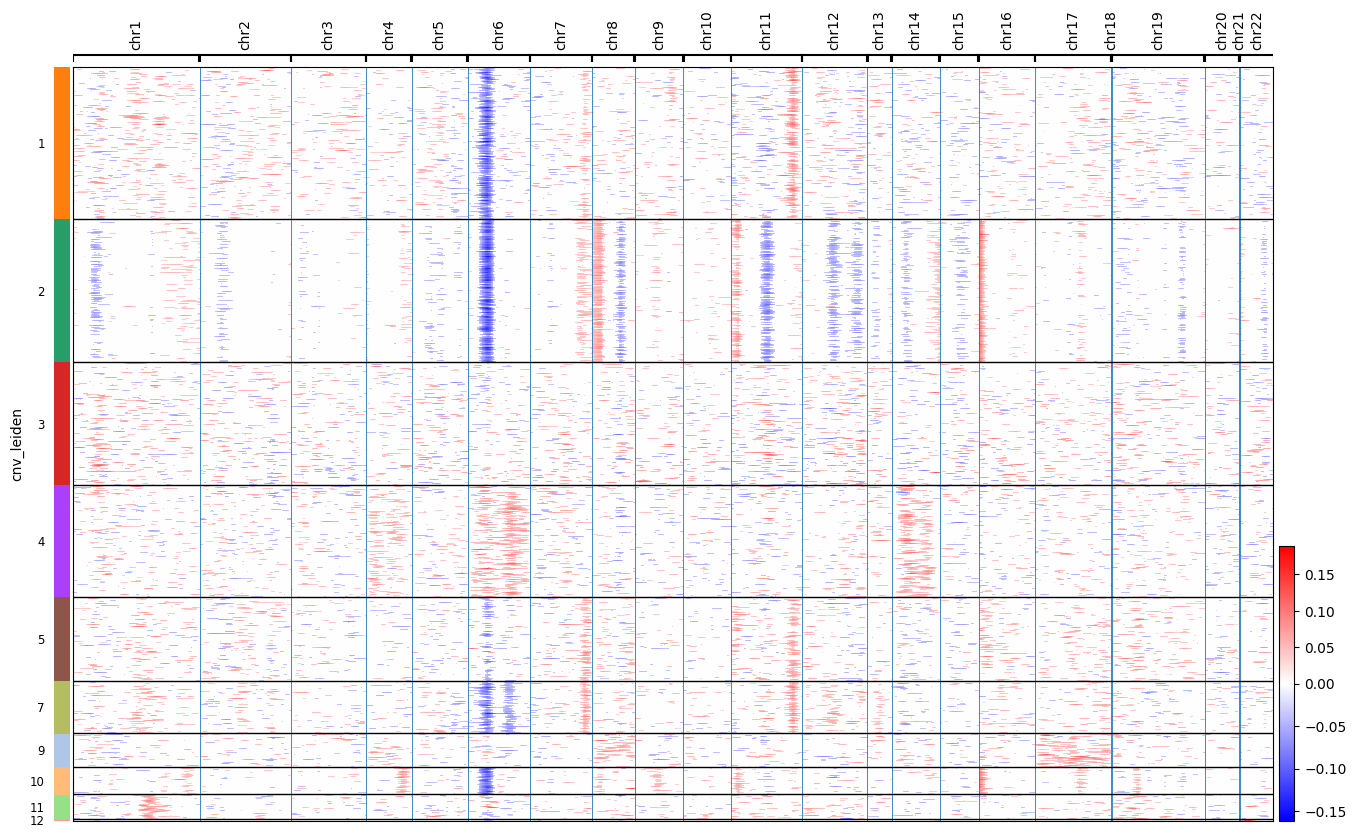

In [112]:
cnv.pl.chromosome_heatmap(adata[adata.obs["cnv_status"] == "normal", :])

<Axes: xlabel='batch'>

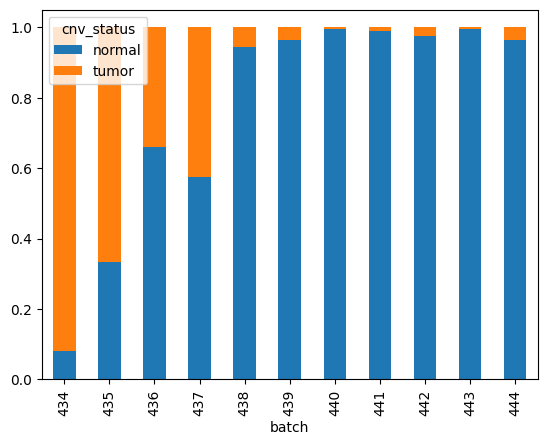

In [119]:
pd.crosstab(adata.obs["cnv_status"], adata.obs["batch"]).apply(lambda r: r/r.sum(), axis = 0).T.plot.bar(stacked = True)

In [120]:
adata.write_h5ad("/Users/randyramdial/Desktop/FoMR/Caron-Test_infercnv_ready.h5ad", compression = "gzip")